In [1]:
import sys
import pandas as pd
from pathlib import Path

# Add project root to Python path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

In [ ]:
import src.loadProcessed as load

counts = load.load_processed_count()

# Initial Exploration

In [3]:
import matplotlib.pyplot as plt
import matplotlib.axes

Text(0, 0.5, 'Count')

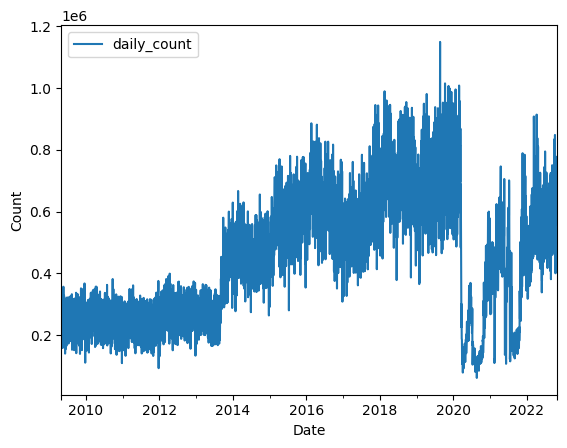

In [4]:
counts_by_sensor: pd.DataFrame = counts.groupby(counts['sensing_date'])['daily_count'].sum().reset_index()

ax: matplotlib.axes.Axes = counts_by_sensor.plot.line(
    x='sensing_date', y='daily_count',
)
ax.set_xlabel("Date")
ax.set_ylabel("Count")

I wanted to visualise how the number of counts changes over time. 
As we can see in the above plot, there is a general trend upwards. There are a few reasons for this I will need to explore. First of these is that more sensors are installed over time so we need to account for that, this will most likely involve treating sensors as categorical variables. Secondly, since I am most interested in the behaviour of the population, rather than the congestion of the city, I would like to account for the population size of melbourne as well as that has increased significantly over time.

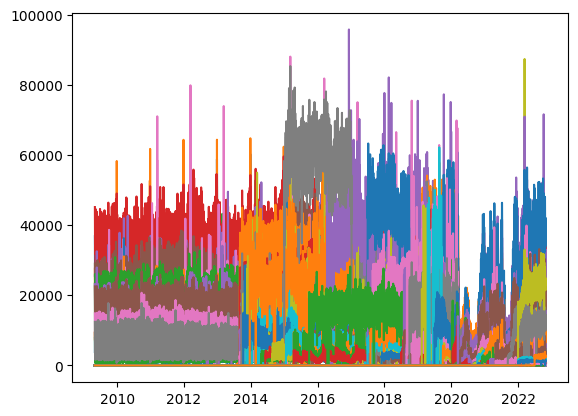

In [11]:
counts_by_sensor: pd.DataFrame = (
    counts.groupby(
        ['sensor_id', 'sensing_date'], observed=False
    )['daily_count']                                                   # ['daily_count'] makes it a series with the multiindex as the index
    .sum()                                                             # So the sum just sums over the values (aggregates hourly_count per sensor x time combo)
    .unstack(level='sensor_id')                                        # Seperates out the multiindex to treat each sensor as a level, date makes up the new index
)

fig, ax = plt.subplots()

ax.plot(counts_by_sensor)
